# Importing Libraries and Loading Data

In [2]:
import sklearn

In [3]:
import pandas as pd 
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0      Influenza   Yes    No     Yes                  Yes   19  Female   
1    Common Cold    No   Yes     Yes                   No   25  Female   
2         Eczema    No   Yes     Yes                   No   25  Female   
3         Asthma   Yes   Yes      No                  Yes   25    Male   
4         Asthma   Yes   Yes      No                  Yes   25    Male   
..           ...   ...   ...     ...                  ...  ...     ...   
344       Stroke   Yes    No     Yes                   No   80  Female   
345       Stroke   Yes    No     Yes                   No   85    Male   
346       Stroke   Yes    No     Yes                   No   85    Male   
347       Stroke   Yes    No     Yes                   No   90  Female   
348       Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
0              Low            Normal         Positive  
1           Normal            Normal         Negative  
2           Normal            Normal         Negative  
3           Normal            Normal         Positive  
4           Normal            Normal         Positive  
..             ...               ...              ...  
344           High              High         Positive  
345           High              High         Positive  
346           High              High         Positive  
347           High              High         Positive  
348           High              High         Positive  

[349 rows x 10 columns]

In [6]:
df1=df[df["Gender"]=="Male"]
len(df1[df1["Outcome Variable"]=="Positive"])/174

0.45977011494252873

In [7]:
df[df["Gender"]=="Male"]["Age"].max()

85

In [8]:
df[df["Gender"]=="Female"]["Age"].median()

45.0

In [9]:
df1=df[df["Gender"]=="Female"]
len(df1[df1["Outcome Variable"]=="Positive"])/176

0.6022727272727273

# Numerical Analysis

In [10]:
# How does our data look like ?
df.sample(5)

Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
39     Bronchitis   Yes   Yes     Yes                  Yes   30    Male   
116      Diabetes   Yes    No      No                   No   40  Female   
296  Osteoporosis   Yes    No     Yes                   No   60    Male   
100     Influenza    No    No      No                   No   38    Male   
2          Eczema    No   Yes     Yes                   No   25  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
39            High              High         Positive  
116           High              High         Negative  
296           High            Normal         Positive  
100         Normal            Normal         Negative  
2           Normal            Normal         Negative

In [11]:
# Checking Data Types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [12]:
#checking for null values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [13]:
df=pd.DataFrame(df)
df["Age"].mode()

0    35
1    45
Name: Age, dtype: int64

In [14]:
# What is the size of dataset
df.shape

(349, 10)

In [15]:
df.head()

Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive

In [16]:
#let's check for number of unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

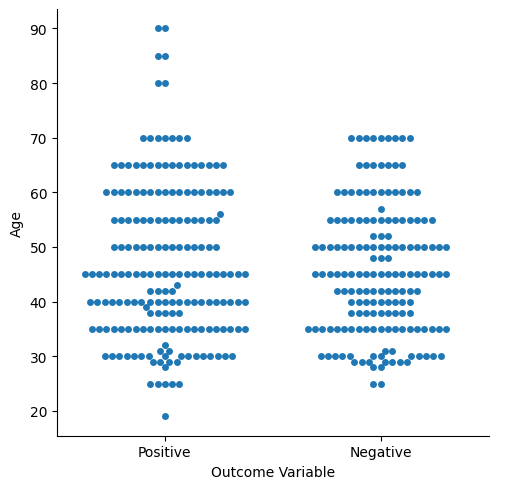

In [17]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df , kind = "swarm")    

### People in old ages have a higher probability of being tested positive for diseases which is an outlier for our dataset

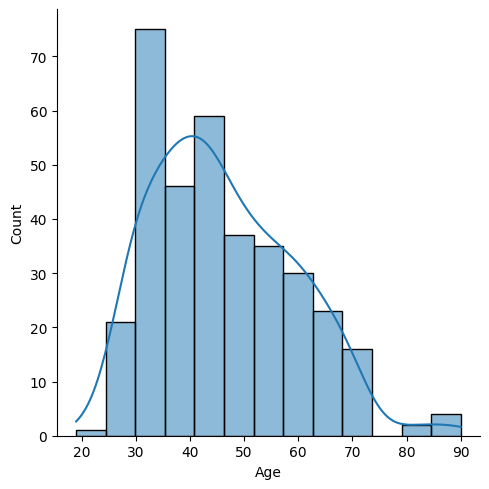

In [18]:
sns.displot(df['Age'] , kde=True)

### There is no major skewness in the dataset with a few outliers

<Axes: >

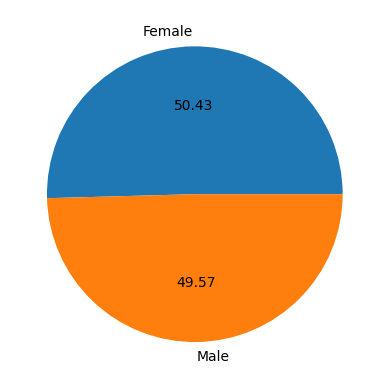

In [19]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

### The dataset is quite evenly distributed based on gender

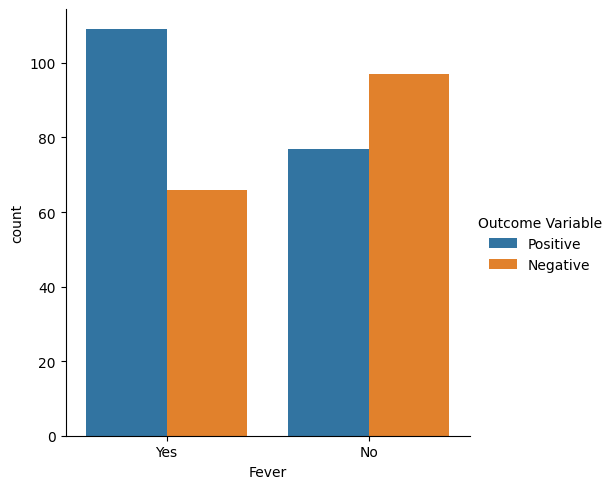

In [20]:
sns.catplot(x='Fever' , kind='count',data=df , hue = "Outcome Variable")

### Having Fever is a major indication of a positive diagnosis

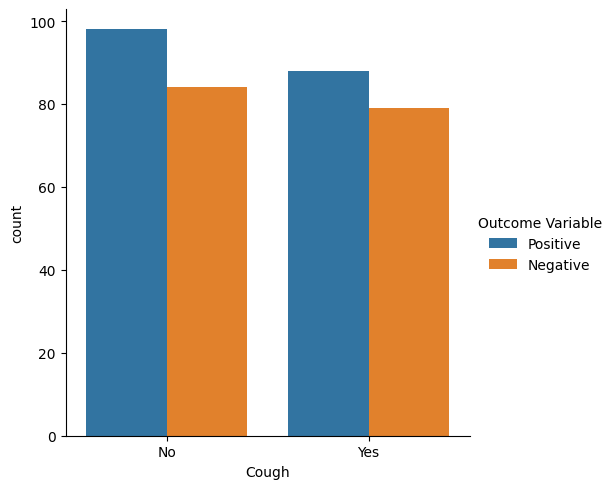

In [21]:
sns.catplot(x='Cough' , kind='count',data=df , hue = "Outcome Variable")

### Nothing major can be inferred from cough as it is quite common

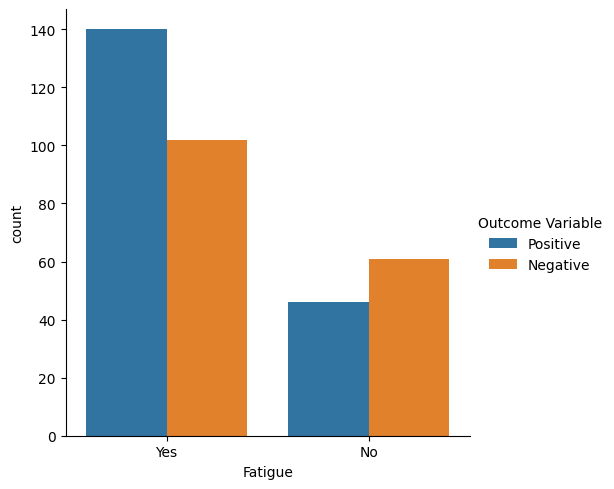

In [22]:
sns.catplot(x='Fatigue' , kind='count',data=df , hue = "Outcome Variable")

### A lot of people irrespective of positive or negative experience a lot of fatique

<Axes: >

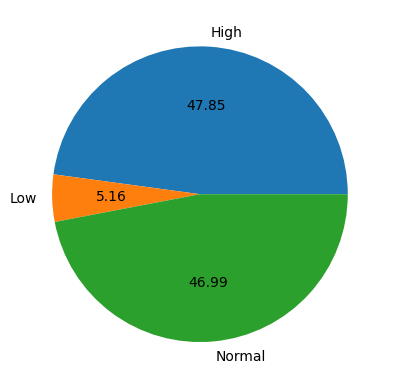

In [23]:
df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

### Majority of the subjects have a normal or high blood pressure

<Axes: >

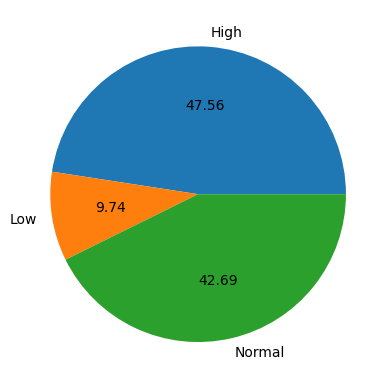

In [24]:
df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

### Majority of the people have high cholestrol and low cholestrol is quite rare

# Classification Model

Let's assume the name of disease irrelevant for this case study to see if general disease diagnosis along with classification algorithms can help to detect diseases


In [25]:
#dropping name column
df = df.iloc[:,1:]

In [26]:
df.tail()

Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure  \
344   Yes    No     Yes                   No   80  Female           High   
345   Yes    No     Yes                   No   85    Male           High   
346   Yes    No     Yes                   No   85    Male           High   
347   Yes    No     Yes                   No   90  Female           High   
348   Yes    No     Yes                   No   90  Female           High   

    Cholesterol Level Outcome Variable  
344              High         Positive  
345              High         Positive  
346              High         Positive  
347              High         Positive  
348              High         Positive

In [27]:
from sklearn.model_selection import train_test_split

In [28]:

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:8],df.iloc[:,-1],
                                                test_size=0.15)

In [29]:
x_train.head()

Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure  \
216   Yes   Yes     Yes                   No   50    Male         Normal   
278   Yes   Yes      No                   No   60  Female           High   
231    No    No     Yes                   No   50  Female         Normal   
314   Yes    No     Yes                  Yes   65    Male           High   
214   Yes    No      No                   No   50    Male           High   

    Cholesterol Level  
216              High  
278            Normal  
231            Normal  
314              High  
214            Normal

# Encoding Categorical Data

In [30]:
#importing libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [31]:
oe = OrdinalEncoder(categories=[['No','Yes']])
x_train_fever = oe.fit_transform(x_train["Fever"].array.reshape(-1, 1))
x_test_fever = oe.transform(x_test["Fever"].array.reshape(-1, 1))


In [32]:
be = OrdinalEncoder(categories=[['No','Yes']])
x_train_cough = be.fit_transform(x_train["Cough"].array.reshape(-1, 1))
x_test_cough = be.transform(x_test["Cough"].array.reshape(-1, 1))

In [33]:
ce = OrdinalEncoder(categories=[['No','Yes']])
x_train_fat = ce.fit_transform(x_train["Fatigue"].array.reshape(-1, 1))
x_test_fat = ce.transform(x_test["Fatigue"].array.reshape(-1, 1))

In [34]:
de = OrdinalEncoder(categories=[['No','Yes']])
x_train_breath = de.fit_transform(x_train["Difficulty Breathing"].array.reshape(-1, 1))
x_test_breath = de.transform(x_test["Difficulty Breathing"].array.reshape(-1, 1))

In [35]:
fe = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_blood = fe.fit_transform(x_train["Blood Pressure"].array.reshape(-1, 1))
x_test_blood = fe.transform(x_test["Blood Pressure"].array.reshape(-1, 1))

In [36]:
ge = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_chol = ge.fit_transform(x_train["Cholesterol Level"].array.reshape(-1, 1))
x_test_chol = ge.transform(x_test["Cholesterol Level"].array.reshape(-1, 1))

In [37]:
ohe = OrdinalEncoder(categories=[['Female','Male']])
x_train_gender = ohe.fit_transform(x_train['Gender'].array.reshape(-1, 1))
x_test_gender = ohe.transform(x_test['Gender'].array.reshape(-1, 1))

In [38]:
x_train_transformed = np.concatenate((x_train_fever,x_train_cough,x_train_fat,x_train_breath,x_train_blood,x_train_chol,x_train_gender),axis=1)

x_test_transformed = np.concatenate((x_test_fever,x_test_cough,x_test_fat,x_test_breath,x_test_blood,x_test_chol,x_test_gender),axis=1)

In [39]:
x_train_transformed

array([[1., 1., 1., ..., 1., 2., 1.],
       [1., 1., 0., ..., 2., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 2., 2., 1.]])

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [42]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Decision Trees


In [43]:
#importing library
from sklearn import tree

In [44]:
type(x_train_transformed)

numpy.ndarray

In [45]:
#implementing decision trees
dtr = tree.DecisionTreeClassifier()
dtr.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [46]:
x_train_transformed

array([[1., 1., 1., ..., 1., 2., 1.],
       [1., 1., 0., ..., 2., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 2., 2., 1.]])

In [47]:
#import matplotlib.pyplot as plt
#from sklearn import tree

# Train the Decision Tree Classifier
dtr = tree.DecisionTreeClassifier()
dtr.fit(x_train_transformed, y_train)




DecisionTreeClassifier()

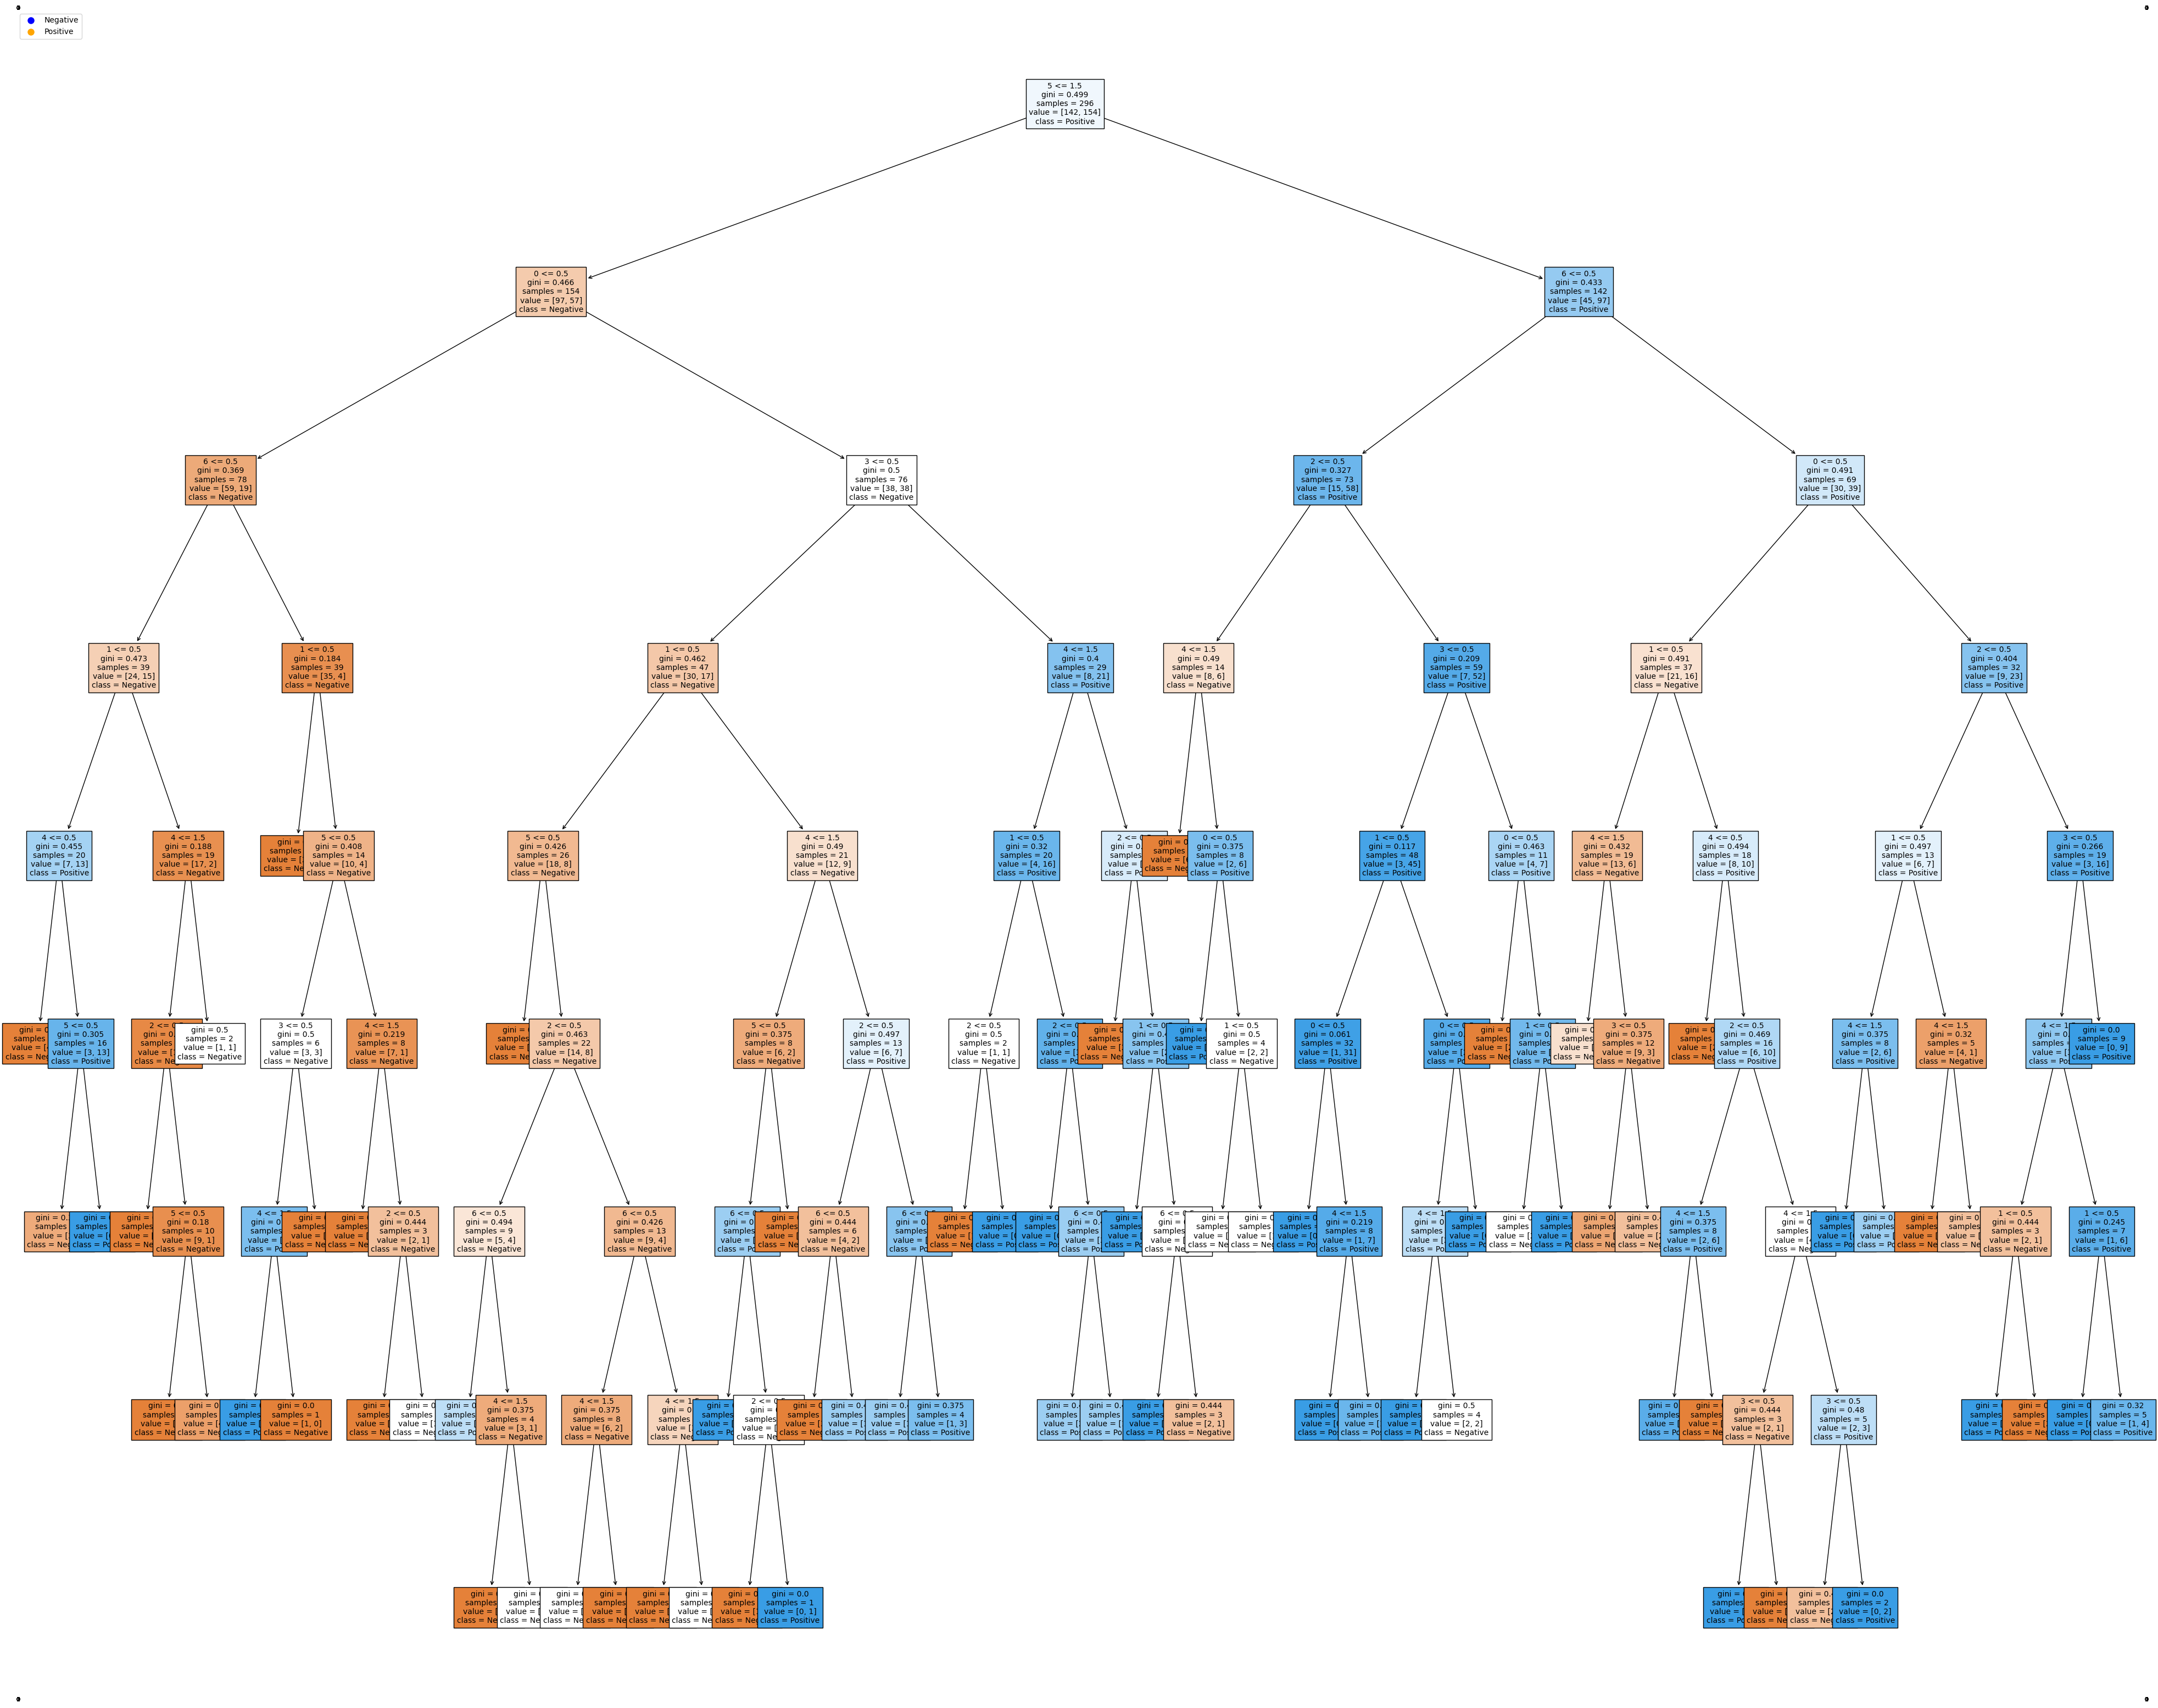

In [48]:
# Plot the decision tree
plt.figure(figsize=(50,40))
tree.plot_tree(dtr, filled=True, feature_names=list(range(x_train_transformed.shape[1])), class_names=['Negative', 'Positive'],fontsize=10)

# Annotate data points with labels
for i in range(len(x_train_transformed)):
    plt.text(x_train_transformed[i][0], x_train_transformed[i][1], str(y_train[i]), fontdict=dict(color='black',size=8))

# Create a custom legend
colors = {'Negative': 'blue', 'Positive': 'orange'}
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=label) for label in colors]
plt.legend(handles=legend_labels, loc='upper left')
# Plot decision tree


plt.show()


In [49]:
#predicting values and testing accuracy
from sklearn.metrics import accuracy_score
dpred=dtr.predict(x_test_transformed)
accuracy_score(dpred,y_test)

0.6037735849056604

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, dpred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, dpred)

# Display classification report
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[13  8]
 [13 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.55        21
           1       0.70      0.59      0.64        32

    accuracy                           0.60        53
   macro avg       0.60      0.61      0.60        53
weighted avg       0.62      0.60      0.61        53



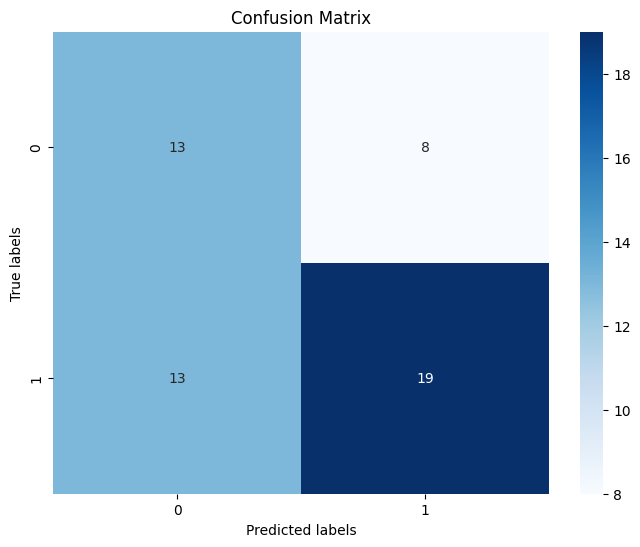

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


# KNN

In [52]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [53]:
#implementing KNN
knn = KNeighborsClassifier()
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [54]:
#predicting values and testing accuracy
kpred = knn.predict(x_test_transformed)
accuracy_score(kpred,y_test)

0.6037735849056604

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, kpred)

# Display confusion matrix
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

# Calculate classification report
class_report_knn = classification_report(y_test, kpred)

# Display classification report
print("\nClassification Report for KNN:")
print(class_report_knn)


Confusion Matrix for KNN:
[[11 10]
 [11 21]]

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        21
           1       0.68      0.66      0.67        32

    accuracy                           0.60        53
   macro avg       0.59      0.59      0.59        53
weighted avg       0.61      0.60      0.61        53



In [56]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, kpred)
print("AUC-ROC:", auc_roc)

# True positives, true negatives, false positives, false negatives
tn, fp, fn, tp = confusion_matrix(y_test, kpred).ravel()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)


AUC-ROC: 0.5900297619047619
True Positives: 21
True Negatives: 11
False Positives: 10
False Negatives: 11


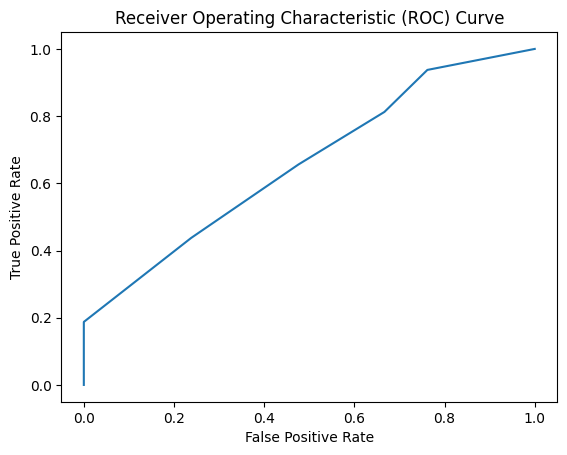

AUC: 0.658


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_pred_proba = knn.predict_proba(x_test_transformed)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.3f}")


# Naive Bayes

In [58]:
#importing library
from sklearn.naive_bayes import GaussianNB

In [59]:
#implementing naive bayes
nb = GaussianNB()
nb.fit(x_train_transformed,y_train)

GaussianNB()

In [60]:
#predicting values and testing accuracy
npred = nb.predict(x_test_transformed)
accuracy_score(npred,y_test)

0.5849056603773585

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, npred)

# Precision
precision = precision_score(y_test, npred, average='weighted')

# Recall
recall = recall_score(y_test, npred, average='weighted')

# F1 Score
f1 = f1_score(y_test, npred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5849056603773585
Precision: 0.5783632221508266
Recall: 0.5849056603773585
F1 Score: 0.580817610062893


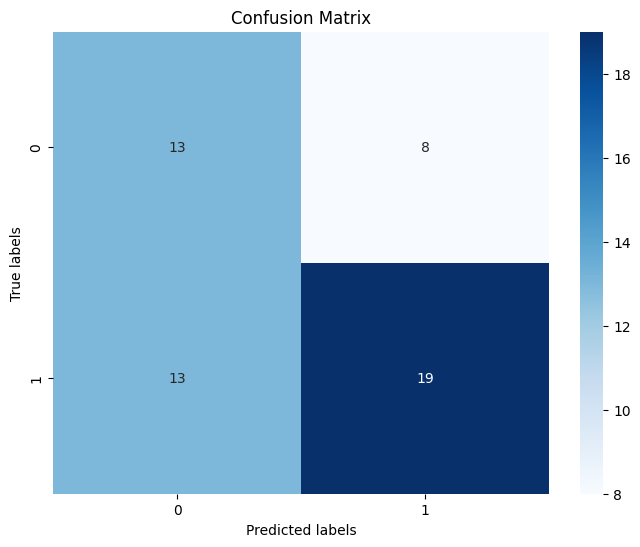

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [64]:
df

Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure  \
0     Yes    No     Yes                  Yes   19  Female            Low   
1      No   Yes     Yes                   No   25  Female         Normal   
2      No   Yes     Yes                   No   25  Female         Normal   
3     Yes   Yes      No                  Yes   25    Male         Normal   
4     Yes   Yes      No                  Yes   25    Male         Normal   
..    ...   ...     ...                  ...  ...     ...            ...   
344   Yes    No     Yes                   No   80  Female           High   
345   Yes    No     Yes                   No   85    Male           High   
346   Yes    No     Yes                   No   85    Male           High   
347   Yes    No     Yes                   No   90  Female           High   
348   Yes    No     Yes                   No   90  Female           High   

    Cholesterol Level Outcome Variable  
0              Normal         Positive  
1              Normal         Negative  
2              Normal         Negative  
3              Normal         Positive  
4              Normal         Positive  
..                ...              ...  
344              High         Positive  
345              High         Positive  
346              High         Positive  
347              High         Positive  
348              High         Positive  

[349 rows x 9 columns]

In [65]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [66]:
print("\nCategorical Features:", categorical_features)
print("\nNumerical Features:", numerical_features)


Categorical Features: Index(['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

Numerical Features: Index(['Age'], dtype='object')


In [67]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [68]:
X = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.cluster import KMeans
# Initialize the model
kmeans = KMeans(n_clusters=3)


In [70]:
# Fit the model
kmeans.fit(X)

KMeans(n_clusters=3)

In [71]:
# Predict the cluster labels
cluster_labels = kmeans.labels_
print("\nCluster Labels:", cluster_labels)


Cluster Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


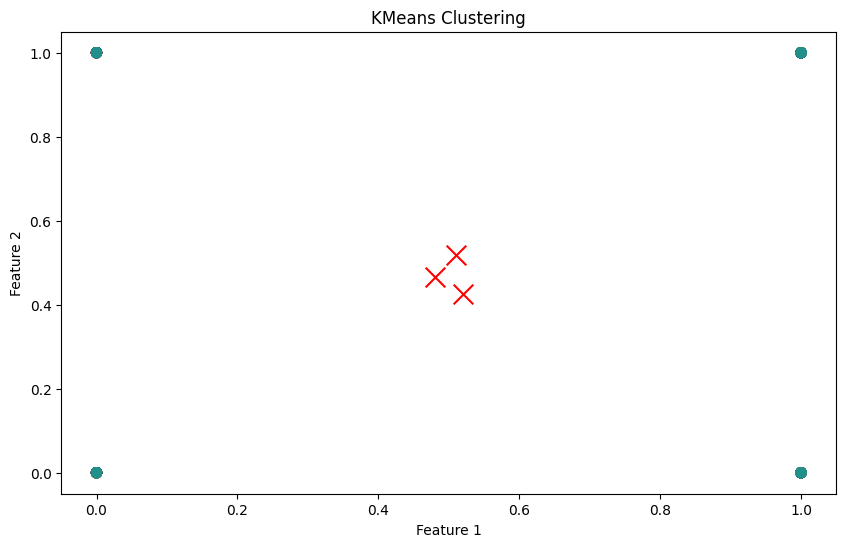

In [72]:
# Plotting the clusters and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

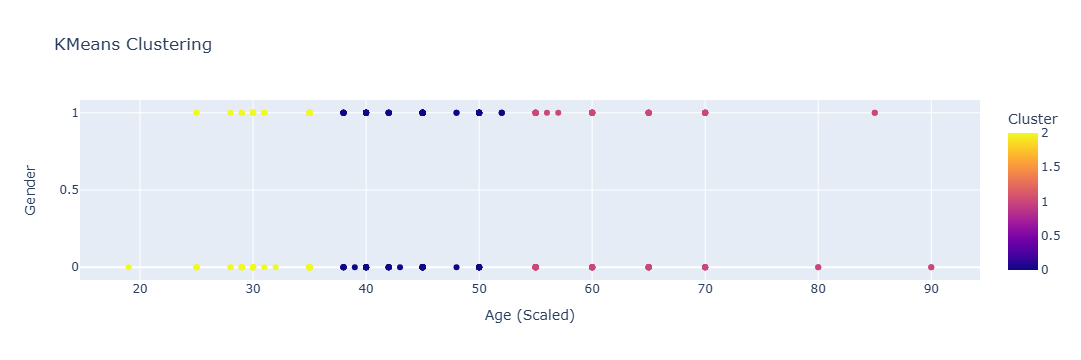

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])



# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Age', y='Gender', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()


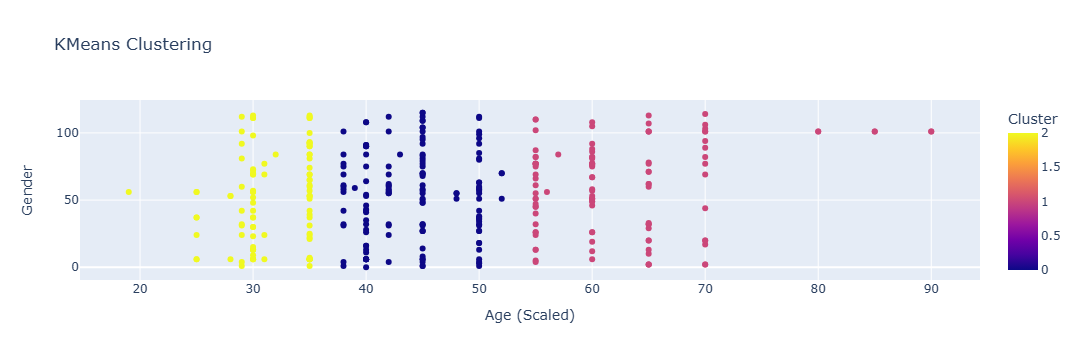

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])



# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Age', y='Disease', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()


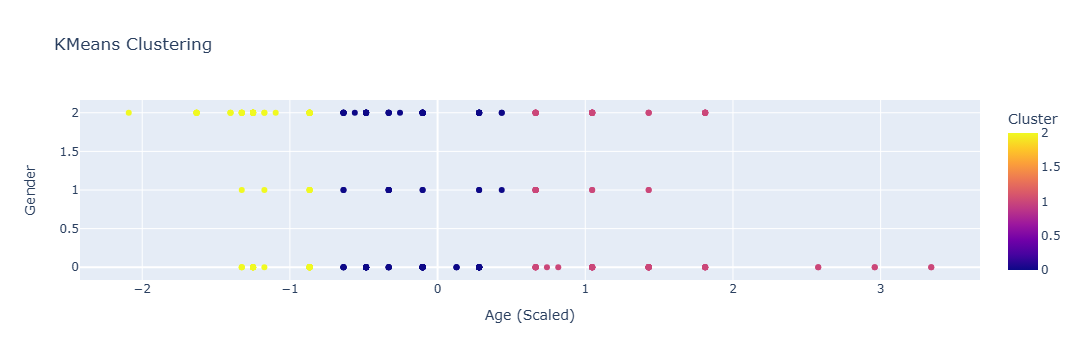

Disease  Fever  Cough  Fatigue  Difficulty Breathing       Age  Gender  \
0         56      1      0        1                     1 -2.091160       0   
1         24      0      1        1                     0 -1.631964       0   
2         37      0      1        1                     0 -1.631964       0   
3          6      1      1        0                     1 -1.631964       1   
4          6      1      1        0                     1 -1.631964       1   
..       ...    ...    ...      ...                   ...       ...     ...   
344      101      1      0        1                     0  2.577328       0   
345      101      1      0        1                     0  2.959991       1   
346      101      1      0        1                     0  2.959991       1   
347      101      1      0        1                     0  3.342654       0   
348      101      1      0        1                     0  3.342654       0   

     Blood Pressure  Cholesterol Level  Outcome Variable  Cluster  
0                 1                  2                 1        2  
1                 2                  2                 0        2  
2                 2                  2                 0        2  
3                 2                  2                 1        2  
4                 2                  2                 1        2  
..              ...                ...               ...      ...  
344               0                  0                 1        1  
345               0                  0                 1        1  
346               0                  0                 1        1  
347               0                  0                 1        1  
348               0                  0                 1        1  

[349 rows x 11 columns]

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scaling numerical variables
numerical_cols = ['Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Age', y='Cholesterol Level', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()

df

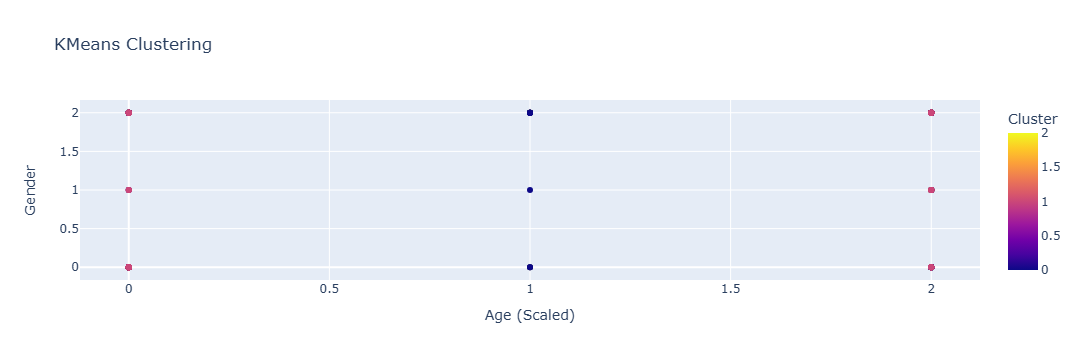

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scaling numerical variables
numerical_cols = ['Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Blood Pressure', y='Cholesterol Level', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()



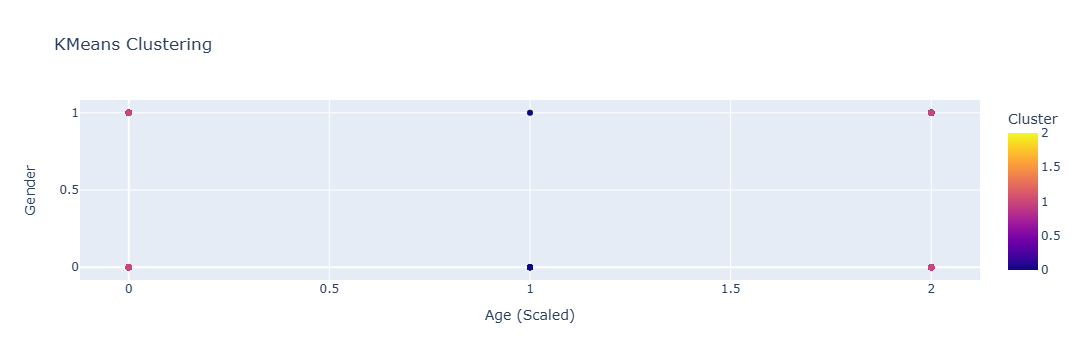

In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scaling numerical variables
numerical_cols = ['Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Blood Pressure', y='Difficulty Breathing', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()



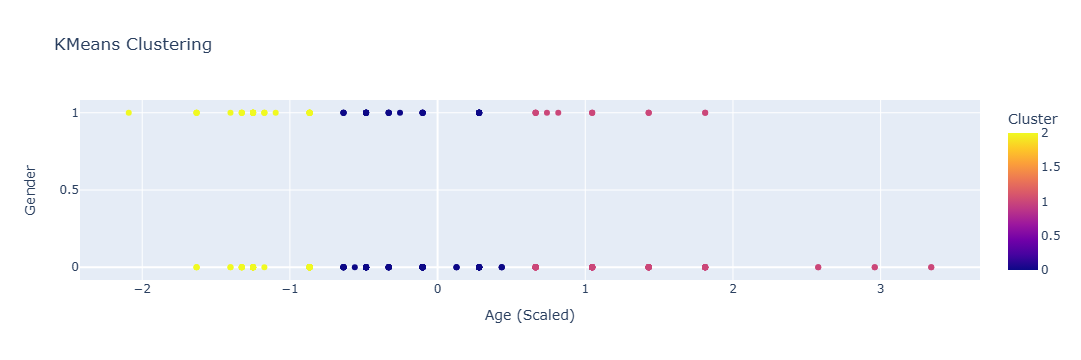

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scaling numerical variables
numerical_cols = ['Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Age', y='Difficulty Breathing', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()



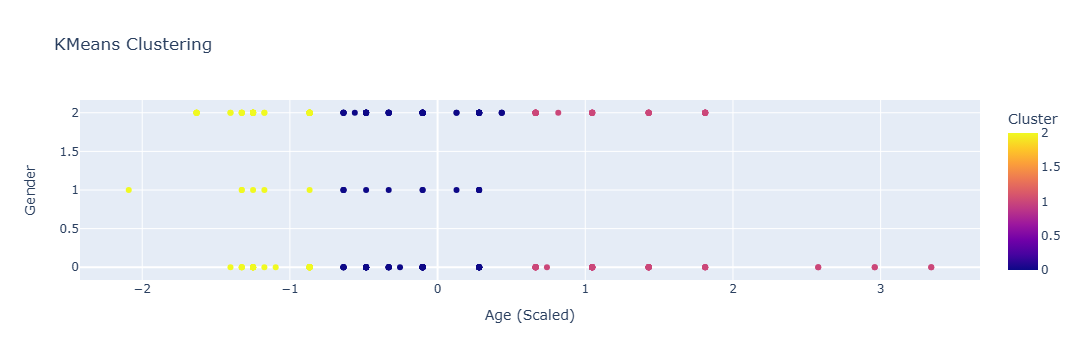

In [79]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

# Load the data
# Assuming your data frame is named df
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scaling numerical variables
numerical_cols = ['Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters using Plotly
fig = px.scatter(df, x='Age', y='Blood Pressure', color='Cluster', title='KMeans Clustering')
fig.update_xaxes(title_text='Age (Scaled)')
fig.update_yaxes(title_text='Gender')
fig.show()


